### Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Type: Type of glass: (class attribute)
#### 1 -- building_windows_float_processed
#### 2 --building_windows_non_float_processed
#### 3 --vehicle_windows_float_processed
#### 4 --vehicle_windows_non_float_processed (none in this database)
#### 5 --containers
#### 6 --tableware
#### 7 --headlamps

In [3]:
df.shape

(214, 10)

In [4]:
len(df)

214

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

1

In [14]:
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [17]:
df.shape

(213, 10)

In [18]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

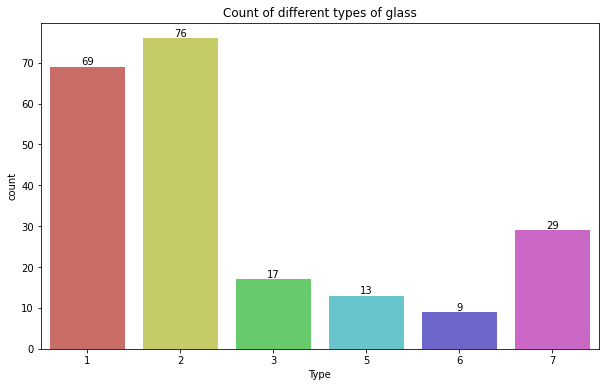

In [19]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type',data=df, palette='hls')
plt.title('Count of different types of glass');
for i in ax.containers:
    ax.bar_label(i,)

In [20]:
# Split into independent and dependent variables

x = df.drop(['Type'],axis=1)
y = df['Type']

In [21]:
np.unique(y,return_counts=True)

(array([1, 2, 3, 5, 6, 7], dtype=int64),
 array([69, 76, 17, 13,  9, 29], dtype=int64))

In [22]:
# Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### <font color='magenta'><b>K-Nearest Neighbor Classifier :

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn_cls = KNeighborsClassifier()

In [74]:
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
train_pred = knn_cls.predict(x_train)
test_pred = knn_cls.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [77]:
accuracy_score(y_train,train_pred)

0.7470588235294118

In [78]:
accuracy_score(y_test,test_pred)

0.5813953488372093

<font color='peach'><b>The model is over-fitting with the default value of k.

In [31]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.39      0.78      0.52         9
           2       0.67      0.67      0.67        18
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.58        43
   macro avg       0.48      0.46      0.45        43
weighted avg       0.52      0.58      0.53        43



In [32]:
print(confusion_matrix(y_test,test_pred))

[[ 7  2  0  0  0  0]
 [ 6 12  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  0  5]]


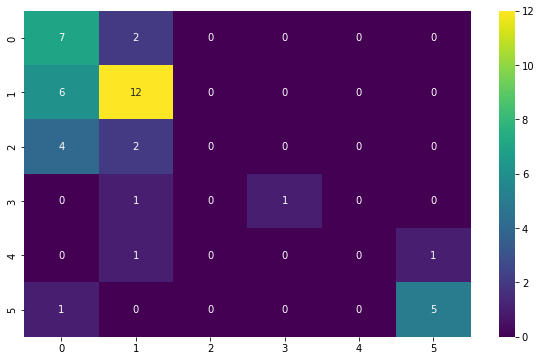

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap = 'viridis');

### <font color='cyan'><b>Grid Search CV :

In [34]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [35]:
knn = KNeighborsClassifier()

k_range = list(range(1, 51))
param_grid = dict(n_neighbors=k_range)

In [40]:
#create a k fold objesct with 10 splits

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True,random_state=1)

In [41]:
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy')

In [42]:
grid_search=grid.fit(x_train, y_train)

In [43]:
grid_search.best_params_

{'n_neighbors': 1}

In [44]:
#visualize grid search

scores_cv =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=kfold,scoring='accuracy')
    scores_cv.append(scores.mean())

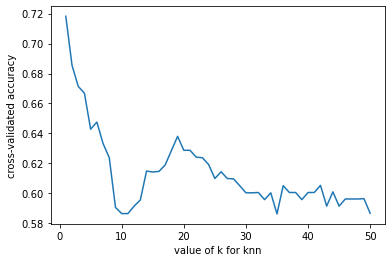

In [45]:
plt.plot(k_range,scores_cv)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated accuracy');

<font color='peach'><b>So the accuracy is best when k=1.

In [46]:
best_knn = grid_search.best_estimator_

In [47]:
train_pred1 = best_knn.predict(x_train)
test_pred1 = best_knn.predict(x_test)

In [48]:
accuracy_score(y_train,train_pred1)

1.0

In [49]:
accuracy_score(y_test,test_pred1)

0.6744186046511628

<font color='peach'><b>But the model is still over-fitting.

In [79]:
# Lets try with k=9

best_knn2 = KNeighborsClassifier(n_neighbors=9)

In [81]:
best_knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [82]:
train_pred2 = best_knn2.predict(x_train)
test_pred2 = best_knn2.predict(x_test)

In [83]:
accuracy_score(y_train,train_pred2)

0.6882352941176471

In [84]:
accuracy_score(y_test,test_pred2)

0.627906976744186

<font color='peach'><b>Now the model is not over-fitting with k=9.

In [85]:
print(classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           1       0.44      0.89      0.59         9
           2       0.72      0.72      0.72        18
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.63        43
   macro avg       0.50      0.49      0.47        43
weighted avg       0.56      0.63      0.57        43



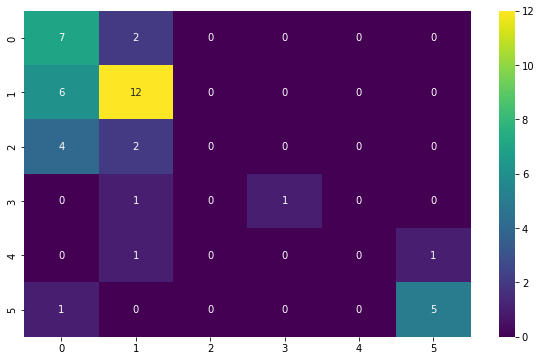

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap = 'viridis');